In [24]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering

In [25]:
# Load in the data and scale it
df = pd.read_csv('data_indiaplant_1_3000.csv', index_col=0)
#df.dropna(inplace=True)

In [26]:
df.columns

Index(['Plant_Id', 'Scientific_Name', 'Common_Name', 'Regional_Name',
       'Category', 'Family', 'Light', 'Water', 'Primary_Grown_for',
       'Flowering_Season', 'Foliage_Color', 'Height_or_Length',
       'Spread_or_Width', 'Plant_Form', 'Lifespan', 'Special_Feature',
       'Plant_Description', 'Growing_Tips'],
      dtype='object')

In [27]:
df

,Plant_Id,Scientific_Name,Common_Name,Regional_Name,Category,Family,Light,Water,Primary_Grown_for,Flowering_Season,Foliage_Color,Height_or_Length,Spread_or_Width,Plant_Form,Lifespan,Special_Feature,Plant_Description,Growing_Tips
0,1,Epiphyllum oxypetalum,"Queen Of The Night, Dutchmans-pipe Cactus",Marathi - Brahma Kamal,"Cacti & Succulents, Shrubs, Indoor Plants",Rhipsalidopsis,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"May, June, July, August, September",Green,1 to 2 meters,1 to 2 meters,"Irregular, Upright or Erect",NaN,"Fragrant flowers or leaves, Auspicious or Feng...","Origin - Mexico to Brazil, Large, flat, thin, ...",Bright indirect sunlight to direct sunlight is...
1,2,Euphorbia grandicornis,Cow Horn Euphorbia,NaN,"Cacti & Succulents, Shrubs",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Foliage,"September, October, November, Flowers are inco...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN,"Animals will not eat, Thorny or Spiny","Nation-Africa, Asia, Shrub grow-3 feet tall, B...","Full sun min 4 hours of sunlight, Sand in pott..."
2,4,Euphorbia milli thai hybrid,Crown Of Thorns New Hybrids,NaN,"Cacti & Succulents, Shrubs, Flowering Pot Plants",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN,"Auspicious or Feng Shui plant, Good for Hedges...",This page is dedicated to no particular variet...,Full to diffused sunlight best. Minimum 3 to 4...
3,5,Euphorbia milli speciosa rubra,Crown Of Thorns - Red,NaN,"Cacti & Succulents, Flowering Pot Plants, Shrubs",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,50 cms to 100 cms,50 cms to 100 cms,Spreading,NaN,"Good for Hedges and Borders, Good for Edges ie...","A small flowered type of the euphorbia milli.,...",Full to diffused sunlight best. Minimum 3 to 4...
4,7,Euphorbia milli thai hybrid orange,Euphorbia Milli Thai Hyb Orange,NaN,"Cacti & Succulents, Shrubs, Flowering Pot Plants",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN,"Auspicious or Feng Shui plant, Good for Hedges...",Extremely large flowered plants of the Thai go...,Full to diffused sunlight best. Minimum 3 to 4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,2996,Garcinia indica variegated,Garcinia Variegated,"Hindi - Kokum Variegated, Marathi - Bheranda, ...","Trees, Medicinal Plants, Shrubs",Guttiferae or Nutmeg family,"Sun growing, Semi shade","Normal, Can tolerate more",Foliage,Flowers are inconspicuous,"Variegated, Green, White",4 to 6 meters,2 to 4 meters,Upright or Erect,NaN,"Indigenous (native to India), Auspicious or Fe...",This is a variegated leaf form of the regular ...,"Grows best in red lateratic fertile soils., Re..."
906,2997,Ficus cyatbistipula,NaN,NaN,"Shrubs, Trees",Moraceae or Fig family,"Sun growing, Semi shade","Normal, Can tolerate more",Foliage,Flowers are inconspicuous,Green,4 to 6 meters,2 to 4 meters,Upright or Erect,NaN,"Good for screening, Good for Hedges and Border...","A large leaved ficus., It can be distinguished...",As with most ficus this one too is easy to gro...
907,2998,Zephyranthes candida flava,Zephyranthes Cream Color,NaN,"Lilies & Bulbous plants, Groundcovers, Bamboos...",Amarylidaceae or Agave or Amaryllis family,"Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,Less than 50 cms,Less than 50 cms,"Spreading, Upright or Erect",NaN,"Good for Edges ie very small hedge or border, ...","Native of Americas., Off white flowers that ar...","Plants are very hardy and 

In [28]:
df.shape

(2463, 18)

In [29]:
df = df.set_index('Plant_Id')
df

,Scientific_Name,Common_Name,Regional_Name,Category,Family,Light,Water,Primary_Grown_for,Flowering_Season,Foliage_Color,Height_or_Length,Spread_or_Width,Plant_Form,Lifespan,Special_Feature,Plant_Description,Growing_Tips
Plant_Id,,,,,,,,,,,,,,,,,
1,Epiphyllum oxypetalum,"Queen Of The Night, Dutchmans-pipe Cactus",Marathi - Brahma Kamal,"Cacti & Succulents, Shrubs, Indoor Plants",Rhipsalidopsis,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"May, June, July, August, September",Green,1 to 2 meters,1 to 2 meters,"Irregular, Upright or Erect",NaN,"Fragrant flowers or leaves, Auspicious or Feng...","Origin - Mexico to Brazil, Large, flat, thin, ...",Bright indirect sunlight to direct sunlight is...
2,Euphorbia grandicornis,Cow Horn Euphorbia,NaN,"Cacti & Succulents, Shrubs",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Foliage,"September, October, November, Flowers are inco...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN,"Animals will not eat, Thorny or Spiny","Nation-Africa, Asia, Shrub grow-3 feet tall, B...","Full sun min 4 hours of sunlight, Sand in pott..."
4,Euphorbia milli thai hybrid,Crown Of Thorns New Hybrids,NaN,"Cacti & Succulents, Shrubs, Flowering Pot Plants",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN,"Auspicious or Feng Shui plant, Good for Hedges...",This page is dedicated to no particular variet...,Full to diffused sunlight best. Minimum 3 to 4...
5,Euphorbia milli speciosa rubra,Crown Of Thorns - Red,NaN,"Cacti & Succulents, Flowering Pot Plants, Shrubs",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,50 cms to 100 cms,50 cms to 100 cms,Spreading,NaN,"Good for Hedges and Borders, Good for Edges ie...","A small flowered type of the euphorbia milli.,...",Full to diffused sunlight best. Minimum 3 to 4...
7,Euphorbia milli thai hybrid orange,Euphorbia Milli Thai Hyb Orange,NaN,"Cacti & Succulents, Shrubs, Flowering Pot Plants",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN,"Auspicious or Feng Shui plant, Good for Hedges...",Extremely large flowered plants of the Thai go...,Full to diffused sunlight best. Minimum 3 to 4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,Garcinia indica variegated,Garcinia Variegated,"Hindi - Kokum Variegated, Marathi - Bheranda, ...","Trees, Medicinal Plants, Shrubs",Guttiferae or Nutmeg family,"Sun growing, Semi shade","Normal, Can tolerate more",Foliage,Flowers are inconspicuous,"Variegated, Green, White",4 to 6 meters,2 to 4 meters,Upright or Erect,NaN,"Indigenous (native to India), Auspicious or Fe...",This is a variegated leaf form of the regular ...,"Grows best in red lateratic fertile soils., Re..."
2997,Ficus cyatbistipula,NaN,NaN,"Shrubs, Trees",Moraceae or Fig family,"Sun growing, Semi shade","Normal, Can tolerate more",Foliage,Flowers are inconspicuous,Green,4 to 6 meters,2 to 4 meters,Upright or Erect,NaN,"Good for screening, Good for Hedges and Border...","A large leaved ficus., It can be distinguished...",As with most ficus this one too is easy to gro...
2998,Zephyranthes candida flava,Zephyranthes Cream Color,NaN,"Lilies & Bulbous plants, Groundcovers, Bamboos...",Amarylidaceae or Agave or Amaryllis family,"Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,Less than 50 cms,Less than 50 cms,"Spreading, Upright or Erect",NaN,"Good for Edges ie very small hedge or border, ...","Native of Americas., Off white flowers that ar...","Plants are very hardy and easy to g

In [30]:
X = df.drop(columns=['Scientific_Name', 'Common_Name', 'Regional_Name','Family', 'Special_Feature',
       'Plant_Description', 'Growing_Tips'])
#species = df[['Plant_Id', 'Scientific_Name']]

In [31]:
X

,Category,Light,Water,Primary_Grown_for,Flowering_Season,Foliage_Color,Height_or_Length,Spread_or_Width,Plant_Form,Lifespan
Plant_Id,,,,,,,,,,
1,"Cacti & Succulents, Shrubs, Indoor Plants","Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"May, June, July, August, September",Green,1 to 2 meters,1 to 2 meters,"Irregular, Upright or Erect",NaN
2,"Cacti & Succulents, Shrubs","Sun growing, Semi shade","Normal, Can tolerate less",Foliage,"September, October, November, Flowers are inco...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN
4,"Cacti & Succulents, Shrubs, Flowering Pot Plants","Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN
5,"Cacti & Succulents, Flowering Pot Plants, Shrubs","Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,50 cms to 100 cms,50 cms to 100 cms,Spreading,NaN
7,"Cacti & Succulents, Shrubs, Flowering Pot Plants","Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN
...,...,...,...,...,...,...,...,...,...,...
2996,"Trees, Medicinal Plants, Shrubs","Sun growing, Semi shade","Normal, Can tolerate more",Foliage,Flowers are inconspicuous,"Variegated, Green, White",4 to 6 meters,2 to 4 meters,Upright or Erect,NaN
2997,"Shrubs, Trees","Sun growing, Semi shade","Normal, Can tolerate more",Foliage,Flowers are inconspicuous,Green,4 to 6 meters,2 to 4 meters,Upright or Erect,NaN
2998,"Lilies & Bulbous plants, Groundcovers, Bamboos...","Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,Less than 50 cms,Less than 50 cms,"Spreading, Upright or Erect",NaN


In [32]:
X.shape

(2463, 10)

In [33]:
# Counting NaN values in all columns
nan_count = X.isna().sum()

In [34]:
nan_count

Category                0
Light                   1
Water                   2
Primary_Grown_for      34
Flowering_Season       25
Foliage_Color           6
Height_or_Length       39
Spread_or_Width       220
Plant_Form             24
Lifespan             2396
dtype: int64

In [35]:
Y = X.drop(columns=['Lifespan'])
Y['Spread_or_Width'] = Y['Spread_or_Width'].fillna('')

In [36]:
data = Y.dropna(inplace=False)

In [37]:
data.shape

(2362, 9)

In [38]:
nan_c = data.isna().sum()
nan_c

Category             0
Light                0
Water                0
Primary_Grown_for    0
Flowering_Season     0
Foliage_Color        0
Height_or_Length     0
Spread_or_Width      0
Plant_Form           0
dtype: int64

In [39]:
data

,Category,Light,Water,Primary_Grown_for,Flowering_Season,Foliage_Color,Height_or_Length,Spread_or_Width,Plant_Form
Plant_Id,,,,,,,,,
1,"Cacti & Succulents, Shrubs, Indoor Plants","Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"May, June, July, August, September",Green,1 to 2 meters,1 to 2 meters,"Irregular, Upright or Erect"
2,"Cacti & Succulents, Shrubs","Sun growing, Semi shade","Normal, Can tolerate less",Foliage,"September, October, November, Flowers are inco...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect
4,"Cacti & Succulents, Shrubs, Flowering Pot Plants","Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect
5,"Cacti & Succulents, Flowering Pot Plants, Shrubs","Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,50 cms to 100 cms,50 cms to 100 cms,Spreading
7,"Cacti & Succulents, Shrubs, Flowering Pot Plants","Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect
...,...,...,...,...,...,...,...,...,...
2996,"Trees, Medicinal Plants, Shrubs","Sun growing, Semi shade","Normal, Can tolerate more",Foliage,Flowers are inconspicuous,"Variegated, Green, White",4 to 6 meters,2 to 4 meters,Upright or Erect
2997,"Shrubs, Trees","Sun growing, Semi shade","Normal, Can tolerate more",Foliage,Flowers are inconspicuous,Green,4 to 6 meters,2 to 4 meters,Upright or Erect
2998,"Lilies & Bulbous plants, Groundcovers, Bamboos...","Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,Less than 50 cms,Less than 50 cms,"Spreading, Upright or Erect"


In [40]:
category = list(set(data['Category'].tolist()))
category_sep = []
for item in category:
    category_sep.extend(item.split(','))

In [41]:
category_sep_s = [item.strip() for item in category_sep]
category_sep_s

['Indoor Plants',
 'Climbers',
 'Creepers & Vines',
 'Groundcovers',
 'Groundcovers',
 'Cacti & Succulents',
 'Medicinal Plants',
 'Cacti & Succulents',
 'Groundcovers',
 'Shrubs',
 'Shrubs',
 'Fruit Plants',
 'Trees',
 'Fruit Plants',
 'Medicinal Plants',
 'Fruit Plants',
 'Climbers',
 'Creepers & Vines',
 'Medicinal Plants',
 'Shrubs',
 'Indoor Plants',
 'Water & Aquatic Plants',
 'Climbers',
 'Creepers & Vines',
 'Bamboos',
 'Grasses & Grass like plants',
 'Ferns',
 'Groundcovers',
 'Water & Aquatic Plants',
 'Vegetable',
 'Medicinal Plants',
 'Climbers',
 'Creepers & Vines',
 'Terrific Tropicals  The Ideal Gifts',
 'Lilies & Bulbous plants',
 'Groundcovers',
 'Shrubs',
 'Rose Floribundas',
 'Bamboos',
 'Grasses & Grass like plants',
 'Water & Aquatic Plants',
 'Shrubs',
 'Indoor Plants',
 'Groundcovers',
 'Shrubs',
 'Groundcovers',
 'Indoor Plants',
 'Climbers',
 'Creepers & Vines',
 'Medicinal Plants',
 'Cacti & Succulents',
 'Groundcovers',
 'Shrubs',
 'Flowering Pot Plants',
 'C

In [42]:
category_sep_s = list(set(category_sep_s))
category_sep_s

['Ferns',
 'Bromeliads',
 'Medicinal Plants',
 'Palms and Cycads',
 'Indoor Plants',
 'Rose Hybrid Teas',
 'Creepers & Vines',
 'Grasses & Grass like plants',
 'Water & Aquatic Plants',
 'Vegetable',
 'Climbers',
 'Terrific Tropicals  The Ideal Gifts',
 'Rose Miniatures',
 'Orchids',
 'Rose Climbers',
 'Groundcovers',
 'Flowering Pot Plants',
 'Cacti & Succulents',
 'Rose Floribundas',
 'Spice plants & edible Herbs',
 'lawns',
 'Shrubs',
 'Trees',
 'Lilies & Bulbous plants',
 'Bamboos',
 'Fruit Plants']

In [43]:
len(category_sep_s)

26

In [44]:
light = list(set(data['Light'].tolist()))
light_sep = []
for item in light:
    light_sep.extend(item.split(','))
    
light_sep_s = [item.strip() for item in light_sep]
light_sep_s = list(set(light_sep_s))
light_sep_s

['Low light tolerant', 'Sun growing', 'Shade growing', 'Semi shade']

In [45]:
water = list(set(data['Water'].tolist()))
water_sep = []
for item in water:
    water_sep.extend(item.split(','))
    
water_sep_s = [item.strip() for item in water_sep]
water_sep_s = list(set(water_sep_s))
water_sep_s

['Can tolerate more',
 'Requires less',
 'Requires more',
 'Can tolerate less',
 'Normal']

In [46]:
grown = list(set(data['Primary_Grown_for'].tolist()))
grown_sep = []
for item in grown:
    grown_sep.extend(item.split(','))
    
grown_sep_s = [item.strip() for item in grown_sep]
grown_sep_s = list(set(grown_sep_s))
grown_sep_s

['Roots or tubers', 'Flowers', 'Fruit or Seed', 'Stems or Timber', 'Foliage']

In [47]:
foliage = list(set(data['Foliage_Color'].tolist()))
foliage_sep = []
for item in foliage:
    foliage_sep.extend(item.split(','))
    
foliage_sep_s = [item.strip() for item in foliage_sep]
foliage_sep_s = list(set(foliage_sep_s))
foliage_sep_s

['Blue Grey or Silver',
 'Variegated',
 'Orange',
 'Yellow',
 'Bronze or coppery',
 'Red',
 'Green',
 'Blue',
 'Very dark green almost black',
 'Pink',
 'White',
 'Brown',
 'Purple',
 'Cream or off white']

In [48]:
season = list(set(data['Flowering_Season'].tolist()))
season_sep = []
for item in season:
    season_sep.extend(item.split(','))
    
season_sep_s = [item.strip() for item in season_sep]
season_sep_s = list(set(season_sep_s))
season_sep_s

['January',
 'February',
 'July',
 'May',
 'September',
 'Flowers in flushes throughout the year',
 'June',
 'August',
 'Year-around flowering',
 'Non Flowering',
 'Flowers are inconspicuous',
 'Flowers once in many years',
 'November',
 'April',
 'October',
 'December',
 'March']

In [49]:
spread = list(set(data['Spread_or_Width'].tolist()))
spread_sep = []
for item in spread:
    spread_sep.extend(item.split(','))
    
spread_sep_s = [item.strip() for item in spread_sep]
spread_sep_s = list(set(spread_sep_s))
spread_sep_s

['',
 '6 to 8 meters',
 'More than 12 meters',
 '2 to 4 meters',
 'Less than 50 cms',
 '8 to 12 meters',
 '50 cms to 100 cms',
 '4 to 6 meters',
 '1 to 2 meters']

In [50]:
data.columns

Index(['Category', 'Light', 'Water', 'Primary_Grown_for', 'Flowering_Season',
       'Foliage_Color', 'Height_or_Length', 'Spread_or_Width', 'Plant_Form'],
      dtype='object')

In [51]:
data_category = data['Category'].str.get_dummies(', ').add_prefix('Category_')
data_light = data['Light'].str.get_dummies(', ').add_prefix('Light_')
data_water = data['Water'].str.get_dummies(', ').add_prefix('Water_')
data_Primary_Grown_for = data['Primary_Grown_for'].str.get_dummies(', ').add_prefix('Primary_Grown_for_')
data_Flowering_Season = data['Flowering_Season'].str.get_dummies(', ').add_prefix('Flowering_Season_')
data_Foliage_Color = data['Foliage_Color'].str.get_dummies(', ').add_prefix('Foliage_Color_')
data_Height_or_Length = data['Height_or_Length'].str.get_dummies(', ').add_prefix('Height_or_Length_')
data_Spread_or_Width = data['Spread_or_Width'].str.get_dummies(', ').add_prefix('Spread_or_Width_')
data_Plant_Form = data['Plant_Form'].str.get_dummies(', ').add_prefix('Plant_Form_')

In [52]:
data_encoded = pd.concat([data_category, data_light, data_water, data_Primary_Grown_for, data_Flowering_Season, data_Foliage_Color, data_Height_or_Length, data_Spread_or_Width, data_Plant_Form], axis = 1)

In [53]:
data_encoded.shape

(2362, 97)

In [54]:
data_encoded

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers,...,Plant_Form_Climbing or growing on support,Plant_Form_Columnar,Plant_Form_Irregular,Plant_Form_Low spreading,Plant_Form_Oval,Plant_Form_Pyramidal,Plant_Form_Spherical or rounded,Plant_Form_Spreading,Plant_Form_Upright or Erect,Plant_Form_Weeping
Plant_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2998,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0


In [62]:
data_encoded.to_csv("Encoded_data_3000_V3.csv")

In [63]:
data_encoded = pd.read_csv('Encoded_data_3000_V3.csv')

In [73]:
data_encoded = data_encoded.set_index('Plant_Id')
data_encoded

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers,...,Plant_Form_Climbing or growing on support,Plant_Form_Columnar,Plant_Form_Irregular,Plant_Form_Low spreading,Plant_Form_Oval,Plant_Form_Pyramidal,Plant_Form_Spherical or rounded,Plant_Form_Spreading,Plant_Form_Upright or Erect,Plant_Form_Weeping
Plant_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2998,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0


# Kmeans

In [34]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans

In [35]:
kmean_data = data_encoded.copy()

In [36]:
kmeans = KMeans(n_clusters=5, random_state=42)

In [37]:
kmeans.fit(kmean_data)

/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [38]:
# Get cluster labels for each data point
cluster_labels = kmeans.labels_

In [39]:
# Add cluster labels to the original data
kmean_data['Cluster'] = cluster_labels

# Display the count of data points in each cluster
print(kmean_data['Cluster'].value_counts())

Cluster
3    789
1    576
0    443
2    400
4    154
Name: count, dtype: int64


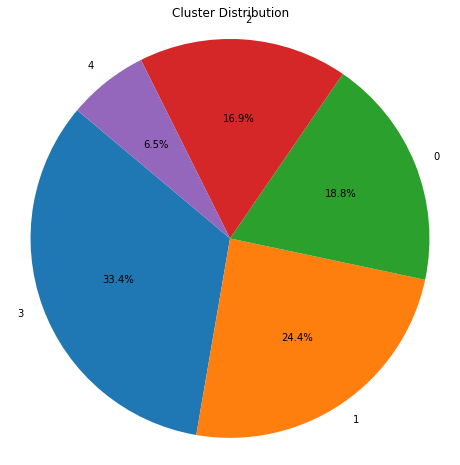

In [40]:
# Calculate the count of data points in each cluster
cluster_counts = kmean_data['Cluster'].value_counts()

# Visualize cluster distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Cluster Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [41]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(data_encoded, cluster_labels)
silhouette_avg

0.09009963206290295

In [42]:
#hyperparameter tuning

In [43]:
# Define a range of cluster numbers to try
cluster_range = range(2, 40)  # Adjust the range as needed

# Initialize lists to store silhouette scores
silhouette_scores = []

# Iterate over the range of cluster numbers
for n_clusters in cluster_range:
    # Initialize K-means model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit K-means model to the data
    kmeans.fit(data_encoded)
    
    # Get cluster labels for each data point
    cluster_labels = kmeans.labels_
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(data_encoded, cluster_labels)
    silhouette_scores.append(silhouette_avg)

/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

In [44]:
# Iterate over the range of cluster numbers
for n_clusters, score in zip(cluster_range, silhouette_scores):
    print(f"Number of clusters: {n_clusters}, Silhouette score: {score}")

Number of clusters: 2, Silhouette score: 0.12341436008651399
Number of clusters: 3, Silhouette score: 0.14379567543587932
Number of clusters: 4, Silhouette score: 0.09021210829972179
Number of clusters: 5, Silhouette score: 0.09009963206290295
Number of clusters: 6, Silhouette score: 0.10285760789313689
Number of clusters: 7, Silhouette score: 0.10865414451602495
Number of clusters: 8, Silhouette score: 0.11600167359502195
Number of clusters: 9, Silhouette score: 0.12299690036595114
Number of clusters: 10, Silhouette score: 0.12698398928937732
Number of clusters: 11, Silhouette score: 0.13457798315161143
Number of clusters: 12, Silhouette score: 0.13835301213715964
Number of clusters: 13, Silhouette score: 0.13662986820464174
Number of clusters: 14, Silhouette score: 0.1459509674335354
Number of clusters: 15, Silhouette score: 0.14845893377455469
Number of clusters: 16, Silhouette score: 0.15397290357722346
Number of clusters: 17, Silhouette score: 0.1576906700804716
Number of clusters

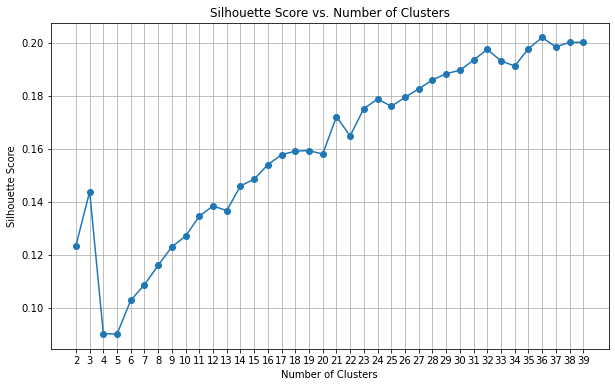

In [45]:
# Plot the silhouette scores for different numbers of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [46]:
optimal_data = data_encoded.copy()

In [47]:
# Initialize K-means model with a different number of clusters
kmeans = KMeans(n_clusters=60, random_state=42)  # Adjust the number of clusters as needed

# Fit K-means model to the data
kmeans.fit(data_encoded)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the original data
optimal_data['Cluster'] = cluster_labels

# Display the count of data points in each cluster
print(optimal_data['Cluster'].value_counts())

# Calculate the silhouette score
silhouette_avg = silhouette_score(data_encoded, cluster_labels)

print("The average silhouette score is:", silhouette_avg)

/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster
12    150
5     140
26     97
0      66
6      63
46     61
19     59
52     58
13     58
23     54
29     53
4      53
20     52
27     47
48     46
32     45
49     43
34     43
57     42
22     42
8      42
37     42
21     41
58     40
50     40
43     40
35     39
17     38
30     38
3      38
28     37
7      37
44     37
11     33
45     28
41     28
31     27
25     27
39     26
15     26
1      25
56     24
38     24
47     24
2      23
54     22
9      22
51     22
10     22
55     20
16     20
36     20
18     19
14     16
53     15
40     15
59     14
42     13
33     13
24     13
Name: count, dtype: int64
The average silhouette score is: 0.21542191511240352


In [48]:
# Initialize K-means model with a different number of clusters
kmeans = KMeans(n_clusters=36, random_state=42)  # Adjust the number of clusters as needed

# Fit K-means model to the data
kmeans.fit(data_encoded)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the original data
optimal_data['Cluster'] = cluster_labels

# Display the count of data points in each cluster
print(optimal_data['Cluster'].value_counts())

# Calculate the silhouette score
silhouette_avg = silhouette_score(data_encoded, cluster_labels)

print("The average silhouette score is:", silhouette_avg)

/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster
27    150
13    136
11    115
2     108
28     94
23     86
29     86
8      79
3      78
26     74
21     72
16     72
5      69
12     66
25     66
9      65
4      64
14     63
0      63
18     60
10     59
17     57
20     54
7      51
24     51
34     50
32     47
6      46
15     46
35     45
1      43
33     42
19     37
22     26
31     22
30     20
Name: count, dtype: int64
The average silhouette score is: 0.20191774067510262


# Cosine Similarity on Onehot vector

In [74]:
data_encoded

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers,...,Plant_Form_Climbing or growing on support,Plant_Form_Columnar,Plant_Form_Irregular,Plant_Form_Low spreading,Plant_Form_Oval,Plant_Form_Pyramidal,Plant_Form_Spherical or rounded,Plant_Form_Spreading,Plant_Form_Upright or Erect,Plant_Form_Weeping
Plant_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2998,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0


In [75]:
data_encoded.columns

Index(['Category_Bamboos', 'Category_Bromeliads',
       'Category_Cacti & Succulents', 'Category_Climbers',
       'Category_Creepers & Vines', 'Category_Ferns',
       'Category_Flowering Pot Plants', 'Category_Fruit Plants',
       'Category_Grasses & Grass like plants', 'Category_Groundcovers',
       'Category_Indoor Plants', 'Category_Lilies & Bulbous plants',
       'Category_Medicinal Plants', 'Category_Orchids',
       'Category_Palms and Cycads', 'Category_Rose Climbers',
       'Category_Rose Floribundas', 'Category_Rose Hybrid Teas',
       'Category_Rose Miniatures', 'Category_Shrubs',
       'Category_Spice plants & edible Herbs',
       'Category_Terrific Tropicals  The Ideal Gifts', 'Category_Trees',
       'Category_Vegetable', 'Category_Water & Aquatic Plants',
       'Category_lawns', 'Light_Low light tolerant', 'Light_Semi shade',
       'Light_Shade growing', 'Light_Sun growing', 'Water_Can tolerate less',
       'Water_Can tolerate more', 'Water_Normal', 'Water_Re

In [76]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_plants(input_values, data, top_n=20):
    # Filter data based on input values
    filtered_data = data.copy()
    for column, value in input_values.items():
        if column in filtered_data.columns:
            filtered_data = filtered_data[filtered_data[column] == value]

    if len(filtered_data) == 0:
        print("No matching plants found for the input criteria.")
        return None
    
    # Prepare input vector for cosine similarity
    input_vector = pd.DataFrame(index=[0], columns=data.columns)
    input_vector = input_vector.fillna(0)  # Fill with zeros initially
    for column, value in input_values.items():
        if column in input_vector.columns:
            input_vector.at[0, column] = 1  # Set the input value to 1 in the input vector

    # Calculate cosine similarity between input vector and filtered data
    similarity_scores = cosine_similarity(input_vector.values, filtered_data.values)
    # Add similarity scores to the filtered data
    filtered_data['Similarity'] = similarity_scores.flatten()

    # Sort by similarity scores in descending order
    recommended_plants = filtered_data.sort_values(by='Similarity', ascending=False).head(top_n)
    #print(recommended_plants)
    return recommended_plants[['Similarity']]

# Example usage:
input_values = {
    'Category_Medicinal Plants': 1,
    'Category_Trees': 1,
    'Light_Sun growing': 1,
    'Water_Requires Less': 1,
    'Primarily_Grown_for_Foliage': 1,
    'Foliage_Color_Green': 1,
    'Height_or_Length_More than 12 meters': 1,
    'Spread_or_Width_More than 12 meters': 1
    
    
}

recommendations = recommend_plants(input_values, data_encoded)
if recommendations is not None:
    print(recommendations)


          Similarity
Plant_Id            
1750        0.679366
2699        0.679366
433         0.679366
1446        0.679366
1759        0.679366
435         0.654654
1352        0.654654
1349        0.632456
1566        0.632456
1356        0.632456
1452        0.632456
612         0.632456
449         0.632456
450         0.632456
2520        0.612372
2521        0.612372
2519        0.612372
1977        0.612372
2571        0.612372
2903        0.612372


In [77]:
list_plant = recommendations.index.tolist()

In [78]:
df

,Scientific_Name,Common_Name,Regional_Name,Category,Family,Light,Water,Primary_Grown_for,Flowering_Season,Foliage_Color,Height_or_Length,Spread_or_Width,Plant_Form,Lifespan,Special_Feature,Plant_Description,Growing_Tips
Plant_Id,,,,,,,,,,,,,,,,,
1,Epiphyllum oxypetalum,"Queen Of The Night, Dutchmans-pipe Cactus",Marathi - Brahma Kamal,"Cacti & Succulents, Shrubs, Indoor Plants",Rhipsalidopsis,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"May, June, July, August, September",Green,1 to 2 meters,1 to 2 meters,"Irregular, Upright or Erect",NaN,"Fragrant flowers or leaves, Auspicious or Feng...","Origin - Mexico to Brazil, Large, flat, thin, ...",Bright indirect sunlight to direct sunlight is...
2,Euphorbia grandicornis,Cow Horn Euphorbia,NaN,"Cacti & Succulents, Shrubs",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Foliage,"September, October, November, Flowers are inco...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN,"Animals will not eat, Thorny or Spiny","Nation-Africa, Asia, Shrub grow-3 feet tall, B...","Full sun min 4 hours of sunlight, Sand in pott..."
4,Euphorbia milli thai hybrid,Crown Of Thorns New Hybrids,NaN,"Cacti & Succulents, Shrubs, Flowering Pot Plants",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN,"Auspicious or Feng Shui plant, Good for Hedges...",This page is dedicated to no particular variet...,Full to diffused sunlight best. Minimum 3 to 4...
5,Euphorbia milli speciosa rubra,Crown Of Thorns - Red,NaN,"Cacti & Succulents, Flowering Pot Plants, Shrubs",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,50 cms to 100 cms,50 cms to 100 cms,Spreading,NaN,"Good for Hedges and Borders, Good for Edges ie...","A small flowered type of the euphorbia milli.,...",Full to diffused sunlight best. Minimum 3 to 4...
7,Euphorbia milli thai hybrid orange,Euphorbia Milli Thai Hyb Orange,NaN,"Cacti & Succulents, Shrubs, Flowering Pot Plants",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN,"Auspicious or Feng Shui plant, Good for Hedges...",Extremely large flowered plants of the Thai go...,Full to diffused sunlight best. Minimum 3 to 4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,Garcinia indica variegated,Garcinia Variegated,"Hindi - Kokum Variegated, Marathi - Bheranda, ...","Trees, Medicinal Plants, Shrubs",Guttiferae or Nutmeg family,"Sun growing, Semi shade","Normal, Can tolerate more",Foliage,Flowers are inconspicuous,"Variegated, Green, White",4 to 6 meters,2 to 4 meters,Upright or Erect,NaN,"Indigenous (native to India), Auspicious or Fe...",This is a variegated leaf form of the regular ...,"Grows best in red lateratic fertile soils., Re..."
2997,Ficus cyatbistipula,NaN,NaN,"Shrubs, Trees",Moraceae or Fig family,"Sun growing, Semi shade","Normal, Can tolerate more",Foliage,Flowers are inconspicuous,Green,4 to 6 meters,2 to 4 meters,Upright or Erect,NaN,"Good for screening, Good for Hedges and Border...","A large leaved ficus., It can be distinguished...",As with most ficus this one too is easy to gro...
2998,Zephyranthes candida flava,Zephyranthes Cream Color,NaN,"Lilies & Bulbous plants, Groundcovers, Bamboos...",Amarylidaceae or Agave or Amaryllis family,"Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,Less than 50 cms,Less than 50 cms,"Spreading, Upright or Erect",NaN,"Good for Edges ie very small hedge or border, ...","Native of Americas., Off white flowers that ar...","Plants are very hardy and easy to g

In [79]:
extracted_rows = df.loc[list_plant]

In [72]:
extracted_rows

,Scientific_Name,Common_Name,Regional_Name,Category,Family,Light,Water,Primary_Grown_for,Flowering_Season,Foliage_Color,Height_or_Length,Spread_or_Width,Plant_Form,Lifespan,Special_Feature,Plant_Description,Growing_Tips
Plant_Id,,,,,,,,,,,,,,,,,
1750,"Cassia renigera, C. javanica x grandis","Java Cassia, Apple-blossom Shower, Javanese Ca...",Marathi - Gulabi Cassia,"Trees, Medicinal Plants",Leguminosae or Fabaceae or Pea family,Sun growing,Normal,Flowers,"May, June, July",Green,More than 12 meters,More than 12 meters,"Upright or Erect, Weeping",NaN,"Attracts birds, Attracts butterflies, Attracts...","Native of Malaysia, Indonesia., A beautiful, m...","It is not a long lived plant., Flowering takes..."
2699,Cassia renigera hybrida,Dark Pnik Cassia Renigera,Marathi - Dark Gulabi Cassia,"Trees, Medicinal Plants",Leguminosae or Fabaceae or Pea family,Sun growing,Normal,Flowers,"May, June, July",Green,More than 12 meters,More than 12 meters,"Upright or Erect, Weeping",NaN,"Fragrant flowers or leaves, Attracts birds, At...","Native of Malaysia, Indonesia., The stamens of...","Flowering takes place when 4-5 years old., It ..."
433,"Litchi chinensis, Nephelium litchi","Litchii. Fruiting Lychee, Leechee, Lychee",NaN,"Fruit Plants, Trees, Medicinal Plants",Sapindaceae or Litchi family,Sun growing,Normal,Fruit or Seed,"January, February, Flowers are inconspicuous",Green,More than 12 meters,More than 12 meters,Spherical or rounded,NaN,"Attracts bees, Evergreen trees, Suitable for a...","One of the most divine tropical fruit., Mild, ...","Soil - deep, fertile, water-retentive., Plants..."
1446,Sterculia foetida,"Sterculia Foetida, Poon Tree, Indian Almond, D...","Marathi - Janglibadam, Hindi - Janglibadam, Be...","Trees, Medicinal Plants",Sterculiaceae or Cocoa family,Sun growing,"Normal, Can tolerate less, Can tolerate more",Fruit or Seed,"January, February",Green,More than 12 meters,More than 12 meters,Upright or Erect,NaN,"Indigenous (native to India), Good for Cut fol...","Origin - Old World Tropics., 20 m tall., Semi ...",The tree will grow in most climates and soils....
1759,Terminalia arjuna,"White Murdah, Arjuna Myrobalan","Marathi - Arjun, Hindi - Arjuna, Bengali - Arj...","Trees, Medicinal Plants",Combretaceae or Terminalia family,Sun growing,"Normal, Can tolerate more",Foliage,"April, May, Flowers are inconspicuous",Green,More than 12 meters,More than 12 meters,Upright or Erect,NaN,"Indigenous (native to India), Auspicious or Fe...","A large deciduous tree - 15-20 m high., Leaves...","Tree grows well in humid, tropical climate and..."
435,Mangifera indica variety baramasi,Mango Baramasi,"Marathi - Amba, Hindi - Aam","Fruit Plants, Trees, Medicinal Plants",Anacardiaceae or Mango or Cashew family,Sun growing,"Normal, Can tolerate less, Can tolerate more",Fruit or Seed,"Year-around flowering, Flowers are inconspicuous",Green,More than 12 meters,More than 12 meters,Spherical or rounded,NaN,"Indigenous (native to India), Fragrant flowers...",Mango all year around? This variety has two or...,"The mango tree is a long lived one., It should..."
1352,Adansonia digitata,"Baobab, Monkey Bread, Sour Gourd, African Cala...","Marathi - Gorak Chinch, Hindi - Gorak Emli, Go...","Trees, Medicinal Plants",Malvaceae Hibiscus or Cotton family,Sun growing,"Normal, Can tolerate less",Foliage,"June, July, August, September",Green,More than 12 meters,More than 12 meters,Upright or Erect,NaN,"Fragrant flowers or leaves, Good for making bo...",From the Indian ocean Island Nation of Madagas...,"Usually planted in large gardens, parks and on..."
1349,"Albizzia lebbeck, Mimosa lebbeck","Frywood, Parrot Tree, Womans Tongue, Black Shi...","Hindi - Shirish, Garso, Kalshish, Sirar, Benga...","Trees, Medicinal Plants",Leguminosae or Fabaceae or Pea family,"Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more","Flowers, Foliage","February, March",Green,More than 12 meters,More than 12 meters,Spreading,NaN,"Indigenous (native to India), Fragrant 

In [81]:
input_values = {
    'Light_Sun growing': 1,
    'Water_Requires Less': 1,
    'Primarily_Grown_for_Foliage': 1,
    'Foliage_Color_Green': 1
}

recommendations = recommend_plants(input_values, data_encoded)
if recommendations is not None:
    print(recommendations)


          Similarity
Plant_Id            
2288        0.500000
1683        0.500000
1843        0.471405
1991        0.471405
1992        0.471405
1916        0.471405
2412        0.471405
38          0.471405
2628        0.471405
2747        0.471405
2748        0.471405
168         0.471405
925         0.471405
1527        0.471405
1987        0.471405
1587        0.471405
800         0.471405
852         0.471405
1050        0.471405
1726        0.471405


In [82]:
data_encoded.columns

Index(['Category_Bamboos', 'Category_Bromeliads',
       'Category_Cacti & Succulents', 'Category_Climbers',
       'Category_Creepers & Vines', 'Category_Ferns',
       'Category_Flowering Pot Plants', 'Category_Fruit Plants',
       'Category_Grasses & Grass like plants', 'Category_Groundcovers',
       'Category_Indoor Plants', 'Category_Lilies & Bulbous plants',
       'Category_Medicinal Plants', 'Category_Orchids',
       'Category_Palms and Cycads', 'Category_Rose Climbers',
       'Category_Rose Floribundas', 'Category_Rose Hybrid Teas',
       'Category_Rose Miniatures', 'Category_Shrubs',
       'Category_Spice plants & edible Herbs',
       'Category_Terrific Tropicals  The Ideal Gifts', 'Category_Trees',
       'Category_Vegetable', 'Category_Water & Aquatic Plants',
       'Category_lawns', 'Light_Low light tolerant', 'Light_Semi shade',
       'Light_Shade growing', 'Light_Sun growing', 'Water_Can tolerate less',
       'Water_Can tolerate more', 'Water_Normal', 'Water_Re

In [ ]:
'''
'Light_Low light tolerant', 'Light_Semi shade',
       'Light_Shade growing', 'Light_Sun growing'
       
'Water_Can tolerate less',
       'Water_Can tolerate more', 'Water_Normal', 'Water_Requires less',
       'Water_Requires more'
       
'Plant_Form_Climbing or growing on support', 'Plant_Form_Columnar',
       'Plant_Form_Irregular', 'Plant_Form_Low spreading', 'Plant_Form_Oval',
       'Plant_Form_Pyramidal', 'Plant_Form_Spherical or rounded',
       'Plant_Form_Spreading', 'Plant_Form_Upright or Erect',
       'Plant_Form_Weeping'
'''

In [1]:
recommendations = recommend_plants(input_values, data_encoded)

NameError: name 'recommend_plants' is not defined